In [16]:
#importing necessary libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import RobustScaler

In [17]:
#importing dataset 

df=pd.read_csv('stroke.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [18]:
#checking basic information about dataset 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [19]:
#checking for explicit null values in each column 

df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [20]:
#checking for implicit null values in column 'smoking_status' and replacing level 'Unknown' to NaNs

df.smoking_status.value_counts()
df['smoking_status']=df['smoking_status'].replace(['Unknown'],np.NaN)

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [21]:
#data preprocessing, mapping categorical variables to one hot encoded version

df = pd.get_dummies(df, columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])


In [22]:
#replacing NaN values in bmi with its mean 

bmi_mean=df.bmi.mean()
values={'bmi':int(bmi_mean)}
df=df.fillna(value=values)
df.bmi.isnull().any()

False

In [23]:
#dropping the rest of NaNs and id, as it's not useful for building a predictive model 

df=df.dropna()
df=df.drop('id', axis=1)

In [24]:
#checking number of rows in dataset 

df.shape[0]

5110

In [25]:
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,0,...,0,0,1,0,0,0,1,1,0,0
1,61.0,0,0,202.21,28.0,1,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0
2,80.0,0,1,105.92,32.5,1,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
3,49.0,0,0,171.23,34.4,1,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,1,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
5106,81.0,0,0,125.20,40.0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0
5107,35.0,0,0,82.99,30.6,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0
5108,51.0,0,0,166.29,25.6,0,0,1,0,0,...,0,0,1,0,0,1,0,1,0,0


In [26]:
#splitting dataset to variables and results 

X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [27]:
#scaling variables values, to minimilise influence of outliers on model 

scaler = RobustScaler()
X = scaler.fit_transform(X)


In [28]:
#splitting dataset to training and testing subsets and building a model using naive bayes algorithm, checking accuracy scores 

def bayes (X, Y, train_size):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = train_size, random_state = 0)
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    y_pred_train=gnb.predict(X_train)
    return accuracy_score(y_test, y_pred), accuracy_score(y_train, y_pred_train)


In [29]:
#checking models accuracies for different sizes of train subsets 

train_set_sizes=[0.2, 0.4, 0.6, 0.8]
accuracy_test=[]
accuracy_train=[]


for size in train_set_sizes:
    results = bayes(X, Y, size)
    accuracy_test.append(results[0])
    accuracy_train.append(results[1])



In [30]:
accuracy_test

[0.8226516634050881,
 0.8290932811480757,
 0.8238747553816047,
 0.8209393346379648]

In [31]:
accuracy_train

[0.8091976516634051, 0.8062622309197651, 0.817351598173516, 0.8197162426614482]

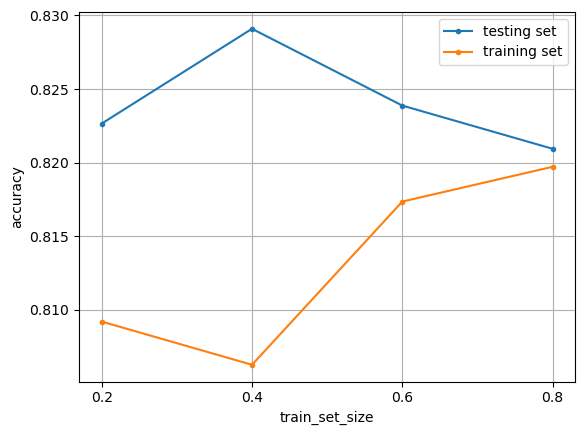

In [32]:
#plotting models accuracies for different train subsets sizes for better visualisation, when test subset is equal to 0.2 of whole dataset, model stabilizes

fig, ax = plt.subplots()
ax.plot(train_set_sizes, accuracy_test, marker='.', label='testing set')
ax.plot(train_set_sizes, accuracy_train, marker='.', label='training set')
ax.set_xticks([0.2, 0.4, 0.6, 0.8])
ax.set_xlabel('train_set_size')
ax.set_ylabel('accuracy')
ax.grid()
plt.legend()
plt.savefig('bayes_size.png')


In [33]:
#building a model based on naive bayes theorem for test size 0,2 and checking its accuracy in 50 iterations

def bayes (X, Y, r_state):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = r_state)
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    y_pred_train=gnb.predict(X_train)
    return accuracy_score(y_test, y_pred), accuracy_score(y_train, y_pred_train)

In [34]:
results_train = []
results_test = []

for i in range(50):
    results = bayes(X, Y, i)
    results_train.append(results[0])
    results_test.append(results[1])

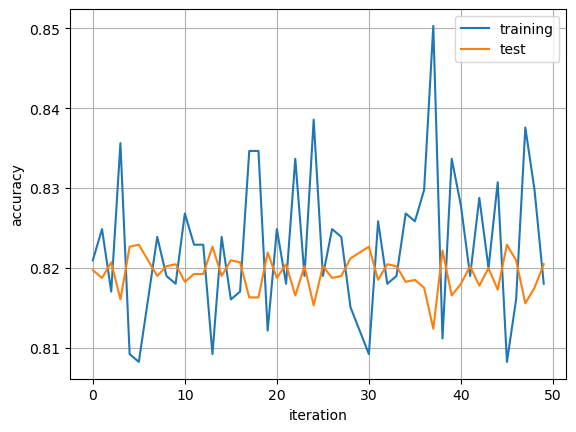

In [35]:
#plotting results of accuracy check for the model in 50 iterations 

fig, ax = plt.subplots()

ax.plot(results_train, label="training")
ax.plot(results_test, label="test")
ax.set_xlabel("iteration")
ax.set_ylabel("accuracy")
ax.grid()
plt.legend()
plt.savefig('bayes_symulacja.png')